In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import torch
import torch.nn as nn
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")
from pinns import *
from local_utils import *

from pinns import *
from intro import *

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
#device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
dev_str = f"{device.type}:{device.index}"

In [3]:
import pickle
with open(f"./inputs/solution_25.pkl", "rb") as f:
    (run_params, params, solution) = pickle.load(f)
    
    
run_params = Struct(**run_params)
params = Struct(**params)

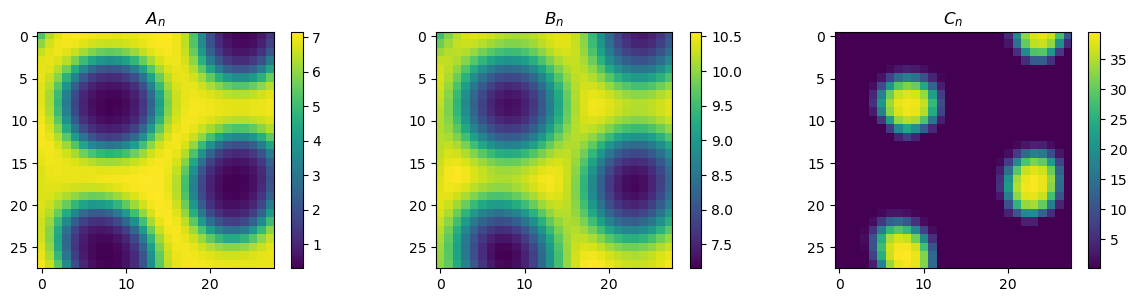

In [4]:
A_n = solution[-1, 0, :, :]
B_n = solution[-1, 1, :, :]
C_n = solution[-1, 2, :, :]

#############################################################
#    Inner boundaries
# By using these slices, we can remove the boundary effects
# or select a smaller portion of the domain
#
#   Important: slices must not be larger than slices(1,-1,1).
#              Otherwise, the boundary effects of finit difference
#              Laplacian cannot be removed
#
x_slice = slice(50,-50, 1)
y_slice = slice(50,-50, 1)

to = create_to(A_n[x_slice,y_slice])
########################################
# Take the average of data points
kernel =np.array([[1, 1],
                  [1, 1]])


A_n = ndimage.convolve(A_n, kernel)/4
B_n = ndimage.convolve(B_n, kernel)/4
C_n = ndimage.convolve(C_n, kernel)/4
############################################################
plot_n_im([A_n[x_slice,y_slice], 
           B_n[x_slice,y_slice], 
           C_n[x_slice,y_slice]], 
          [r"$A_{n}$", r"$B_{n}$", r"$C_{n}$"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

In [5]:
A_min, A_max = np.min(A_n), np.max(A_n)
B_min, B_max = np.min(B_n), np.max(B_n)
C_min, C_max = np.min(C_n), np.max(C_n)
n = params["n"]
tol = .005

def define_bound(tol, n, x_min, x_max):
    upper = ((1-tol)/tol)**(1/n)
    lower = (tol/(1-tol))**(1/n)
    # return (lower, upper) bounds and the initial guess
    return (max(0,x_min*lower), x_max*upper), max(0, (x_max*upper-max(0,x_min*lower))/2)
    
K_AA_bound, K_AA_init =  define_bound(tol, n, A_min, A_max)
K_AB_bound, K_AB_init =  define_bound(tol, n, A_min, A_max)
K_AC_bound, K_AC_init =  define_bound(tol, n, A_min, A_max)
K_BA_bound, K_BA_init =  define_bound(tol, n, B_min, B_max)
K_BC_bound, K_BC_init =  define_bound(tol, n, B_min, B_max)
K_CB_bound, K_CB_init =  define_bound(tol, n, C_min, C_max)
K_CC_bound, K_CC_init =  define_bound(tol, n, C_min, C_max)

Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (0, None)
    return Ks_bounds[name]


Epoch: 1 
 data loss:26.699092, 
data A loss:5.202823, data B loss:9.182021, data C loss:12.314248, 
Laplacian A loss:84.304191, Laplacian B loss:28.041352
Physics loss:1.750050
Negative loss:0.134072

 b_A=0.9000, b_B=0.9000, b_C=0.9000, V_A=1.0000, V_B=1.0000, V_C=1.0000, mu_A=0.9000, mu_B=1.0999, K_AA=13.6376, K_AB=13.6376, K_AC=13.6376, K_BA=19.3527, K_BC=19.3527, K_CB=79.0612, K_CC=79.0612


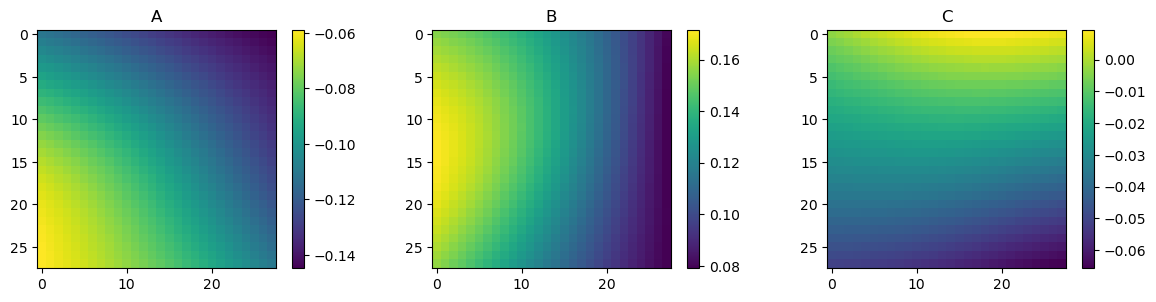

Epoch: 1000 
 data loss:11.968865, 
data A loss:0.621442, data B loss:1.071728, data C loss:10.275694, 
Laplacian A loss:16.030246, Laplacian B loss:27.394403
Physics loss:4.205703
Negative loss:0.228425

 b_A=-0.0609, b_B=20.3991, b_C=1.9024, V_A=7.8377, V_B=46.1728, V_C=57.2569, mu_A=0.8321, mu_B=2.1763, K_AA=4.5589, K_AB=12.6068, K_AC=22.8108, K_BA=23.0942, K_BC=34.0600, K_CB=76.8269, K_CC=20.8458


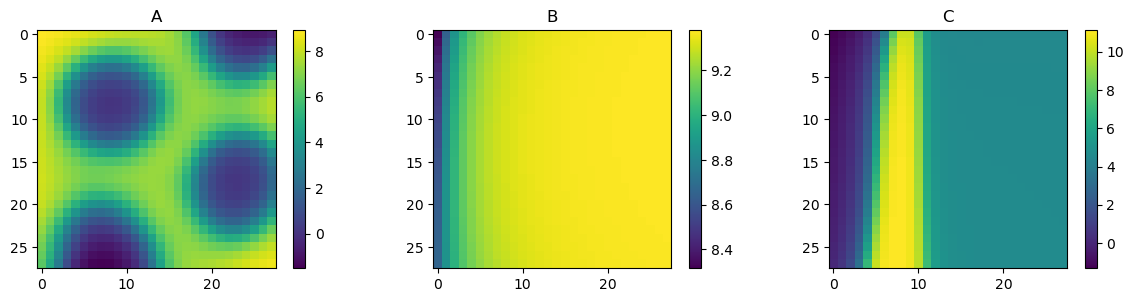

Epoch: 2000 
 data loss:3.729460, 
data A loss:0.247531, data B loss:1.041668, data C loss:2.440261, 
Laplacian A loss:5.767636, Laplacian B loss:27.223851
Physics loss:4.626025
Negative loss:0.178537

 b_A=-0.0154, b_B=78.7970, b_C=0.3425, V_A=8.5645, V_B=70.5665, V_C=35.9271, mu_A=0.9425, mu_B=8.4583, K_AA=4.3685, K_AB=14.9568, K_AC=27.1093, K_BA=20.7077, K_BC=8.2802, K_CB=61.5560, K_CC=13.7585


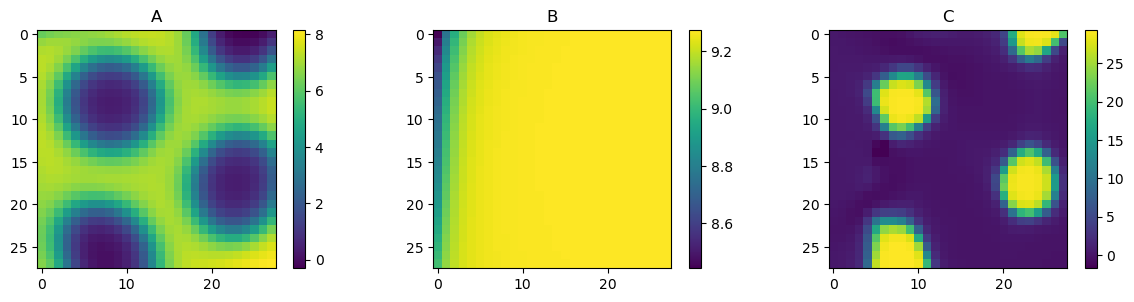

Epoch: 3000 
 data loss:2.002265, 
data A loss:0.197285, data B loss:1.039451, data C loss:0.765529, 
Laplacian A loss:3.504202, Laplacian B loss:27.002782
Physics loss:5.608088
Negative loss:0.069067

 b_A=-0.0183, b_B=144.9018, b_C=0.4065, V_A=8.4457, V_B=57.3929, V_C=36.0993, mu_A=0.9509, mu_B=15.5684, K_AA=4.3413, K_AB=14.0654, K_AC=27.1400, K_BA=23.6901, K_BC=8.9965, K_CB=61.4431, K_CC=17.1580


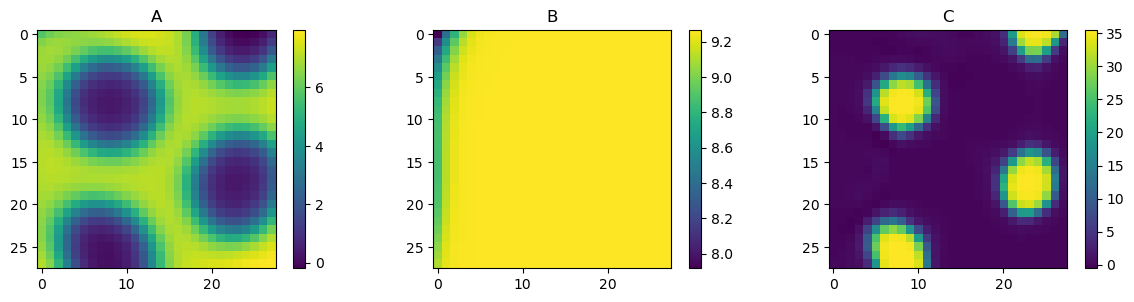

Epoch: 4000 
 data loss:1.592954, 
data A loss:0.160890, data B loss:1.054834, data C loss:0.377230, 
Laplacian A loss:2.543120, Laplacian B loss:26.362467
Physics loss:5.889814
Negative loss:0.027620

 b_A=-0.0209, b_B=205.5960, b_C=0.4117, V_A=8.3756, V_B=7.4537, V_C=36.1057, mu_A=0.9510, mu_B=22.1882, K_AA=4.3447, K_AB=5.3369, K_AC=27.2208, K_BA=26.5622, K_BC=9.2199, K_CB=61.4048, K_CC=18.1253


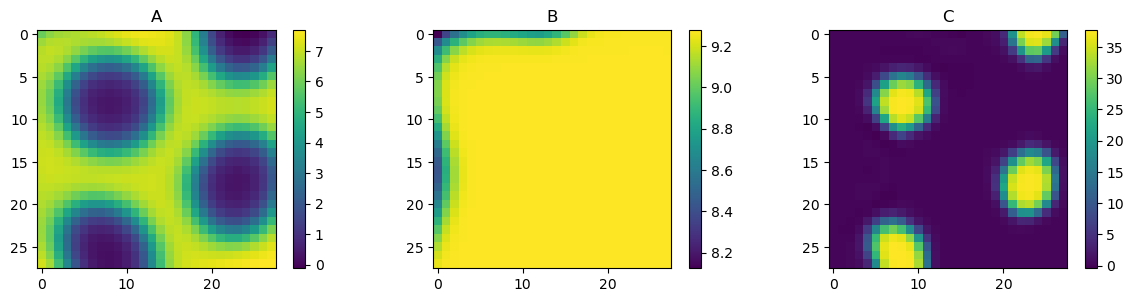

Epoch: 5000 
 data loss:1.453549, 
data A loss:0.132865, data B loss:1.061838, data C loss:0.258847, 
Laplacian A loss:1.961017, Laplacian B loss:26.241365
Physics loss:5.922128
Negative loss:0.019295

 b_A=-0.0224, b_B=251.4344, b_C=0.4079, V_A=8.3446, V_B=7.3090, V_C=36.0558, mu_A=0.9513, mu_B=27.1221, K_AA=4.3476, K_AB=5.3852, K_AC=27.3281, K_BA=28.8847, K_BC=9.2849, K_CB=61.8008, K_CC=18.3566


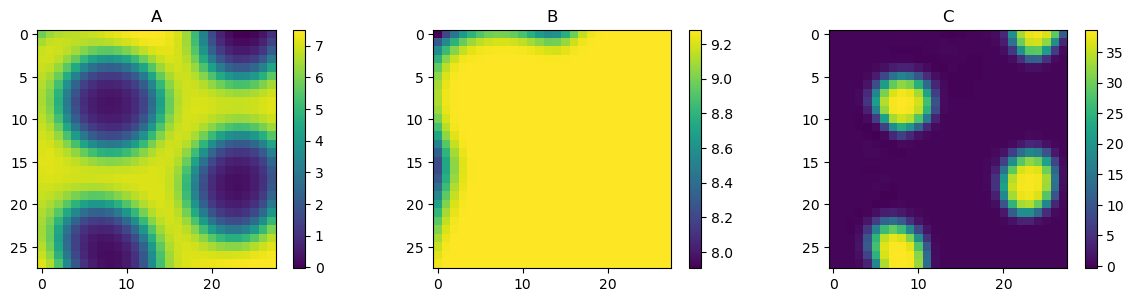

Epoch: 6000 
 data loss:1.385064, 
data A loss:0.109844, data B loss:1.067189, data C loss:0.208032, 
Laplacian A loss:1.607708, Laplacian B loss:26.141995
Physics loss:6.129768
Negative loss:0.014325

 b_A=-0.0210, b_B=274.2075, b_C=0.4035, V_A=8.3101, V_B=6.2929, V_C=35.9956, mu_A=0.9498, mu_B=29.5654, K_AA=4.3513, K_AB=5.0200, K_AC=27.3281, K_BA=31.6588, K_BC=9.3017, K_CB=62.1951, K_CC=18.3439


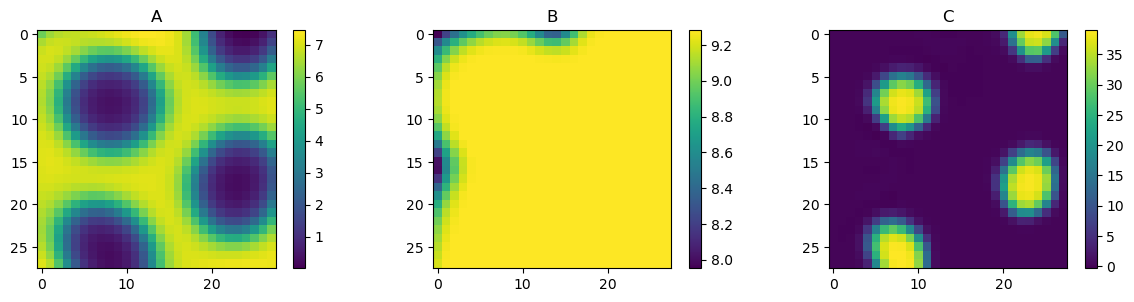

Epoch: 7000 
 data loss:1.333770, 
data A loss:0.092509, data B loss:1.066029, data C loss:0.175231, 
Laplacian A loss:1.376999, Laplacian B loss:26.078702
Physics loss:6.646163
Negative loss:0.011564

 b_A=-0.0164, b_B=275.3704, b_C=0.4013, V_A=8.2841, V_B=5.9313, V_C=35.9210, mu_A=0.9487, mu_B=29.6976, K_AA=4.3526, K_AB=4.9699, K_AC=27.3281, K_BA=34.3509, K_BC=9.3096, K_CB=62.6317, K_CC=18.3232


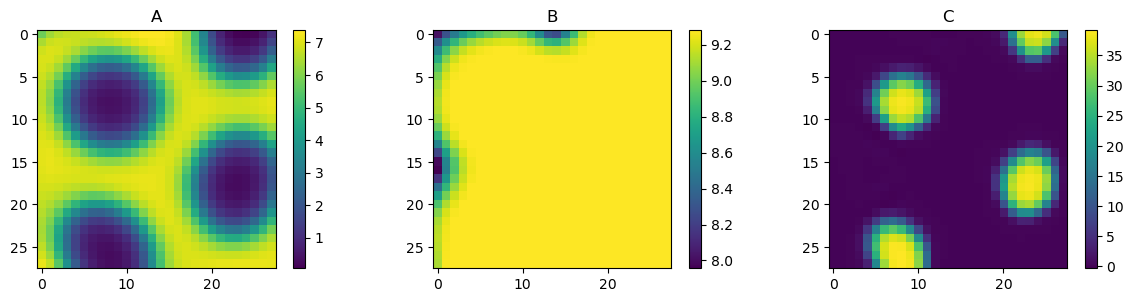

Epoch: 8000 
 data loss:1.191386, 
data A loss:0.081288, data B loss:0.960765, data C loss:0.149333, 
Laplacian A loss:1.246229, Laplacian B loss:21.977576
Physics loss:12.299483
Negative loss:0.009083

 b_A=-0.0106, b_B=266.5166, b_C=0.3981, V_A=8.2665, V_B=25.0145, V_C=26.7997, mu_A=0.9479, mu_B=29.6838, K_AA=4.3519, K_AB=4.6229, K_AC=27.3282, K_BA=37.3555, K_BC=10.9355, K_CB=63.9962, K_CC=18.1804


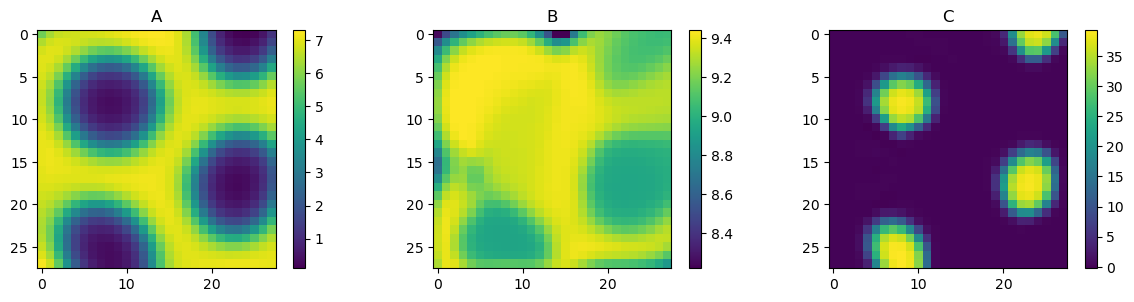

Epoch: 9000 
 data loss:0.898858, 
data A loss:0.074073, data B loss:0.696351, data C loss:0.128434, 
Laplacian A loss:1.038103, Laplacian B loss:12.013816
Physics loss:14.488794
Negative loss:0.007123

 b_A=-0.0079, b_B=205.0269, b_C=0.4012, V_A=8.2660, V_B=70.2134, V_C=19.8237, mu_A=0.9480, mu_B=25.8498, K_AA=4.3530, K_AB=4.3904, K_AC=27.3281, K_BA=37.6347, K_BC=15.4937, K_CB=86.1267, K_CC=18.2965


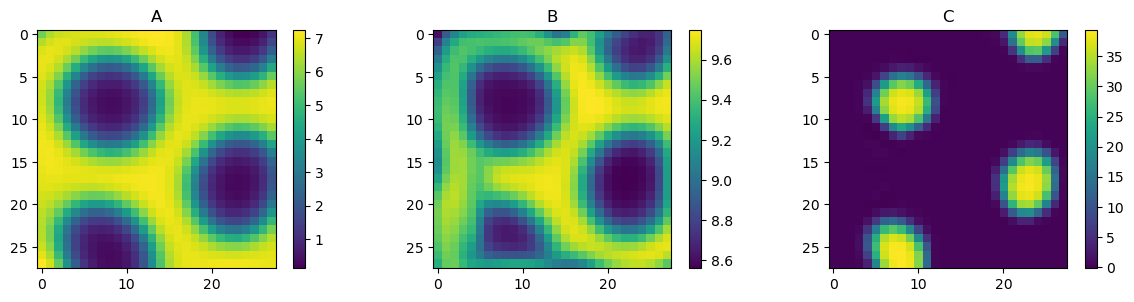

Epoch: 10000 
 data loss:0.745211, 
data A loss:0.074719, data B loss:0.560089, data C loss:0.110403, 
Laplacian A loss:1.220482, Laplacian B loss:7.439080
Physics loss:15.659610
Negative loss:0.005772

 b_A=-0.0196, b_B=133.1936, b_C=0.4010, V_A=8.2691, V_B=82.1248, V_C=18.6806, mu_A=0.9533, mu_B=18.9900, K_AA=4.3635, K_AB=4.2234, K_AC=27.3281, K_BA=34.6019, K_BC=19.5421, K_CB=93.2254, K_CC=18.2975


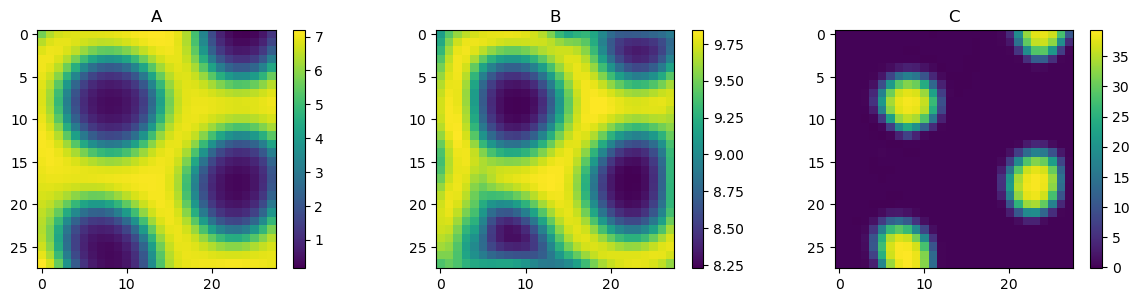

Epoch: 11000 
 data loss:0.514683, 
data A loss:0.065828, data B loss:0.355288, data C loss:0.093567, 
Laplacian A loss:0.814095, Laplacian B loss:2.573445
Physics loss:11.179464
Negative loss:0.004563

 b_A=-0.0208, b_B=47.0166, b_C=0.3967, V_A=8.7129, V_B=90.2376, V_C=20.3400, mu_A=0.9323, mu_B=9.9917, K_AA=4.4103, K_AB=4.4652, K_AC=27.3281, K_BA=19.5247, K_BC=13.1687, K_CB=91.7860, K_CC=18.0080


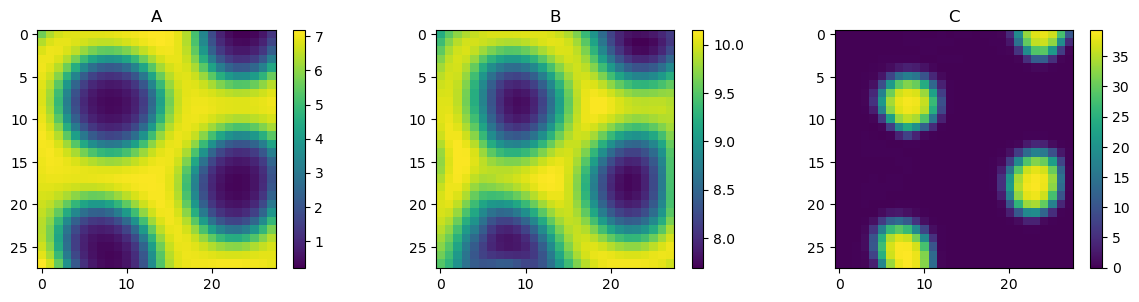

Epoch: 12000 
 data loss:0.383110, 
data A loss:0.058284, data B loss:0.245133, data C loss:0.079694, 
Laplacian A loss:0.731930, Laplacian B loss:1.221652
Physics loss:5.538928
Negative loss:0.004369

 b_A=-0.0305, b_B=6.4017, b_C=0.3751, V_A=11.3466, V_B=90.5611, V_C=33.8387, mu_A=0.9122, mu_B=5.3592, K_AA=4.6460, K_AB=4.8227, K_AC=27.3281, K_BA=12.8752, K_BC=7.9080, K_CB=88.1900, K_CC=16.8231


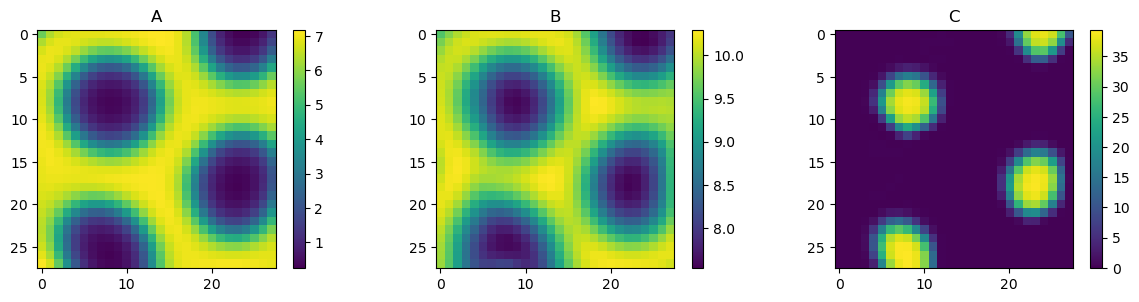

Epoch: 13000 
 data loss:0.277506, 
data A loss:0.053312, data B loss:0.157632, data C loss:0.066561, 
Laplacian A loss:0.655474, Laplacian B loss:0.712452
Physics loss:3.634856
Negative loss:0.003368

 b_A=-0.0351, b_B=-0.0110, b_C=0.3572, V_A=12.7676, V_B=93.1617, V_C=55.6889, mu_A=0.9023, mu_B=4.7121, K_AA=4.7604, K_AB=4.9261, K_AC=27.3281, K_BA=11.8439, K_BC=6.2638, K_CB=85.8575, K_CC=15.8654


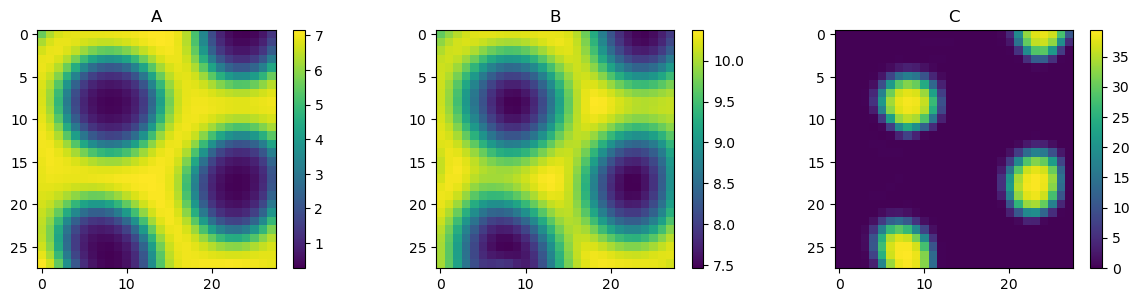

Epoch: 14000 
 data loss:0.208511, 
data A loss:0.049130, data B loss:0.097829, data C loss:0.061551, 
Laplacian A loss:0.596334, Laplacian B loss:0.422315
Physics loss:2.680983
Negative loss:0.003172

 b_A=-0.0388, b_B=-0.0084, b_C=0.3411, V_A=13.9556, V_B=95.6191, V_C=77.9949, mu_A=0.8962, mu_B=4.8060, K_AA=4.8460, K_AB=4.9584, K_AC=27.3281, K_BA=11.2512, K_BC=5.5116, K_CB=82.9649, K_CC=15.2834


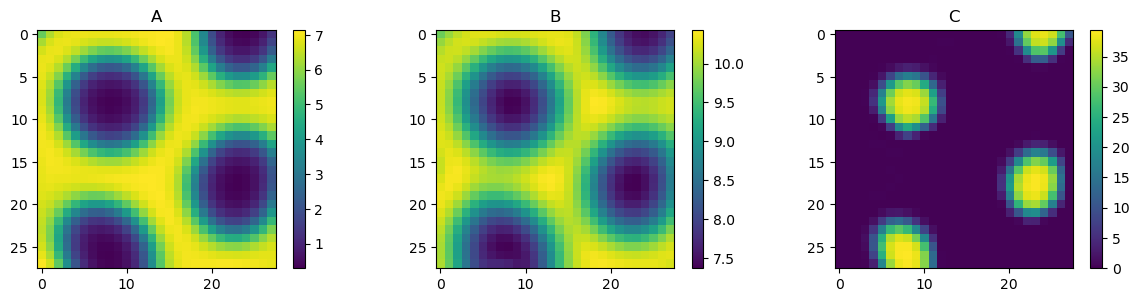

Epoch: 15000 
 data loss:0.153561, 
data A loss:0.045497, data B loss:0.060569, data C loss:0.047495, 
Laplacian A loss:0.535121, Laplacian B loss:0.257885
Physics loss:2.159316
Negative loss:0.000861

 b_A=-0.0410, b_B=-0.0068, b_C=0.3345, V_A=14.9458, V_B=96.9817, V_C=97.5905, mu_A=0.8903, mu_B=4.8576, K_AA=4.9085, K_AB=4.9688, K_AC=27.3281, K_BA=10.8621, K_BC=5.1006, K_CB=78.7011, K_CC=14.9322


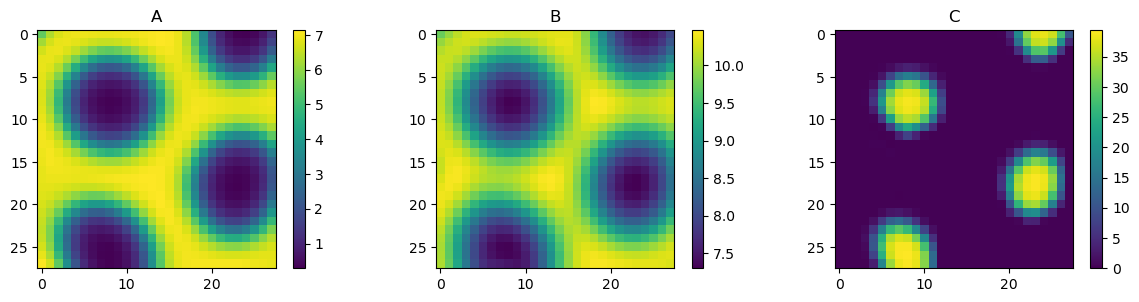

Epoch: 16000 
 data loss:0.127181, 
data A loss:0.042634, data B loss:0.042516, data C loss:0.042032, 
Laplacian A loss:0.490615, Laplacian B loss:0.183642
Physics loss:1.873321
Negative loss:0.000000

 b_A=-0.0435, b_B=-0.0072, b_C=0.3299, V_A=15.6585, V_B=97.6805, V_C=114.5216, mu_A=0.8870, mu_B=4.8838, K_AA=4.9497, K_AB=4.9734, K_AC=27.3281, K_BA=10.6206, K_BC=4.8425, K_CB=72.3114, K_CC=14.7379


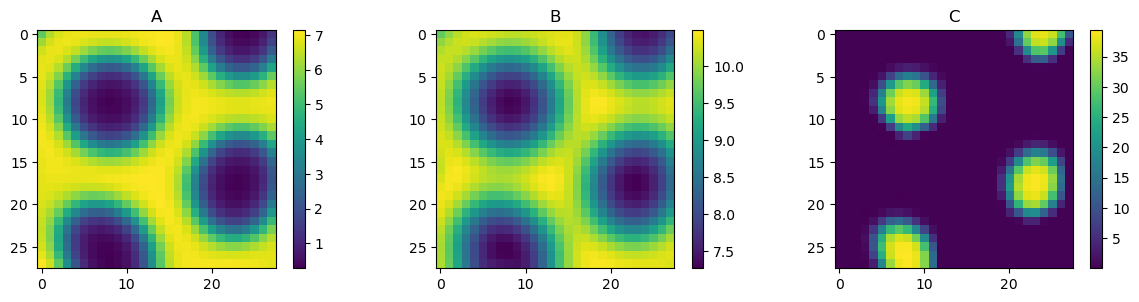

Epoch: 17000 
 data loss:0.114904, 
data A loss:0.041721, data B loss:0.035381, data C loss:0.037801, 
Laplacian A loss:0.710675, Laplacian B loss:0.214262
Physics loss:1.741843
Negative loss:0.000000

 b_A=-0.0371, b_B=-0.0035, b_C=0.3335, V_A=16.1403, V_B=97.9747, V_C=129.5251, mu_A=0.8832, mu_B=4.8930, K_AA=4.9724, K_AB=4.9761, K_AC=27.3281, K_BA=10.4685, K_BC=4.6698, K_CB=60.8495, K_CC=14.6171


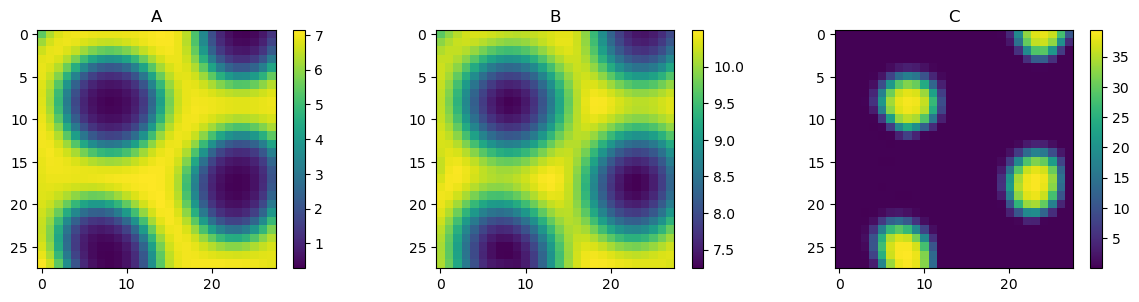

Epoch: 18000 
 data loss:0.110510, 
data A loss:0.038896, data B loss:0.029127, data C loss:0.042487, 
Laplacian A loss:0.422872, Laplacian B loss:0.120842
Physics loss:1.563317
Negative loss:0.000000

 b_A=-0.0430, b_B=-0.0071, b_C=0.3296, V_A=16.5122, V_B=98.0509, V_C=142.8566, mu_A=0.8839, mu_B=4.8841, K_AA=4.9927, K_AB=4.9835, K_AC=27.3281, K_BA=10.3593, K_BC=4.5330, K_CB=8.9185, K_CC=14.5328


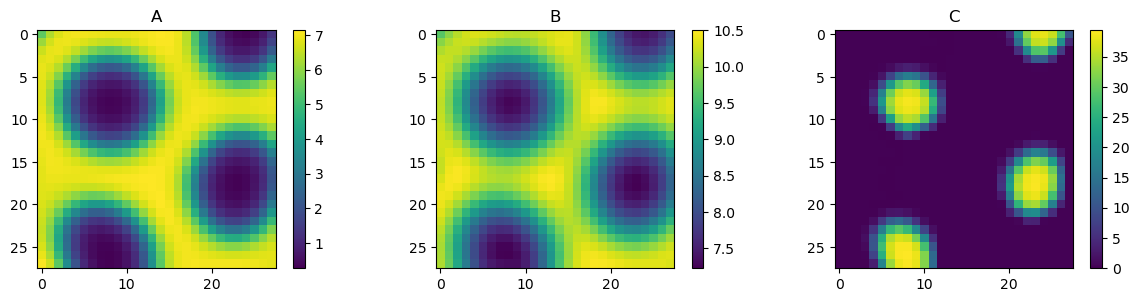

Epoch: 19000 
 data loss:0.094979, 
data A loss:0.037763, data B loss:0.025651, data C loss:0.031564, 
Laplacian A loss:0.397472, Laplacian B loss:0.103069
Physics loss:1.477888
Negative loss:0.000000

 b_A=-0.0447, b_B=-0.0080, b_C=0.3232, V_A=16.8275, V_B=98.1296, V_C=154.9436, mu_A=0.8831, mu_B=4.8850, K_AA=5.0071, K_AB=4.9852, K_AC=27.3281, K_BA=10.2696, K_BC=4.4227, K_CB=8.8563, K_CC=14.4708


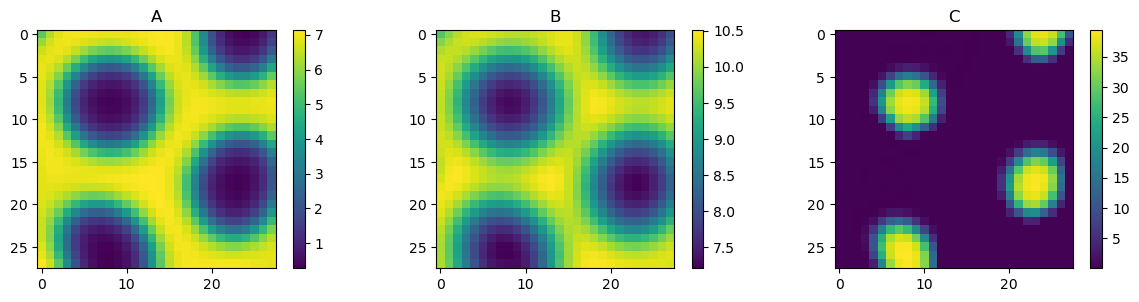

Epoch: 20000 
 data loss:0.089834, 
data A loss:0.037252, data B loss:0.023379, data C loss:0.029203, 
Laplacian A loss:0.394190, Laplacian B loss:0.095476
Physics loss:1.421394
Negative loss:0.000000

 b_A=-0.0420, b_B=-0.0079, b_C=0.3240, V_A=17.0542, V_B=98.1517, V_C=165.9005, mu_A=0.8813, mu_B=4.8853, K_AA=5.0153, K_AB=4.9841, K_AC=27.3281, K_BA=10.2078, K_BC=4.3392, K_CB=8.8401, K_CC=14.4202


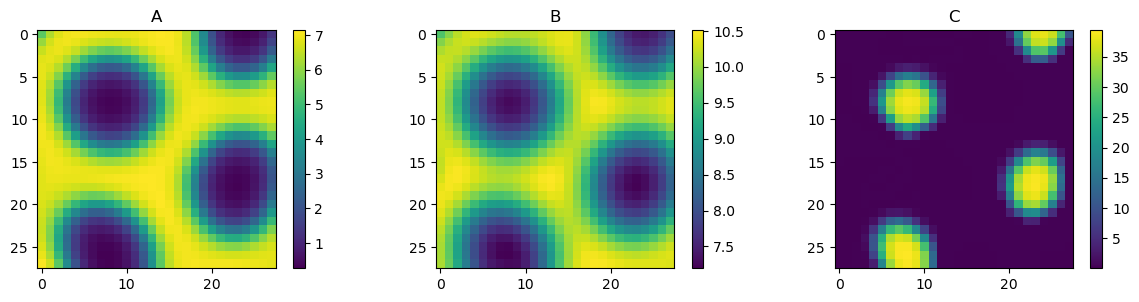

Epoch: 21000 
 data loss:0.084856, 
data A loss:0.036412, data B loss:0.021261, data C loss:0.027183, 
Laplacian A loss:0.371242, Laplacian B loss:0.088618
Physics loss:1.375018
Negative loss:0.000000

 b_A=-0.0450, b_B=-0.0088, b_C=0.3201, V_A=17.2373, V_B=98.1876, V_C=176.0653, mu_A=0.8825, mu_B=4.8859, K_AA=5.0261, K_AB=4.9864, K_AC=27.3281, K_BA=10.1581, K_BC=4.2633, K_CB=8.7746, K_CC=14.3860


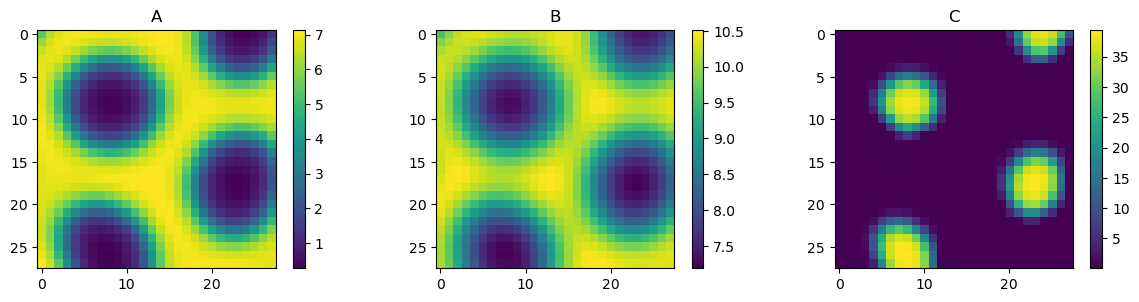

Epoch: 22000 
 data loss:0.081043, 
data A loss:0.035746, data B loss:0.019841, data C loss:0.025456, 
Laplacian A loss:0.346534, Laplacian B loss:0.076130
Physics loss:1.341184
Negative loss:0.000000

 b_A=-0.0454, b_B=-0.0081, b_C=0.3204, V_A=17.3720, V_B=98.2200, V_C=185.4927, mu_A=0.8812, mu_B=4.8859, K_AA=5.0310, K_AB=4.9864, K_AC=27.3281, K_BA=10.1229, K_BC=4.2026, K_CB=8.7025, K_CC=14.3568


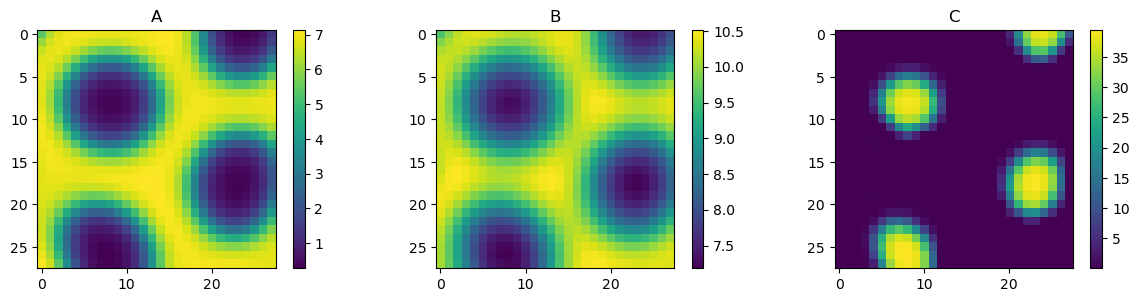

Epoch: 23000 
 data loss:0.077896, 
data A loss:0.035298, data B loss:0.018654, data C loss:0.023944, 
Laplacian A loss:0.335686, Laplacian B loss:0.070807
Physics loss:1.312250
Negative loss:0.000000

 b_A=-0.0443, b_B=-0.0076, b_C=0.3200, V_A=17.4504, V_B=98.2383, V_C=194.3744, mu_A=0.8808, mu_B=4.8863, K_AA=5.0344, K_AB=4.9865, K_AC=27.3281, K_BA=10.1030, K_BC=4.1485, K_CB=8.6493, K_CC=14.3338


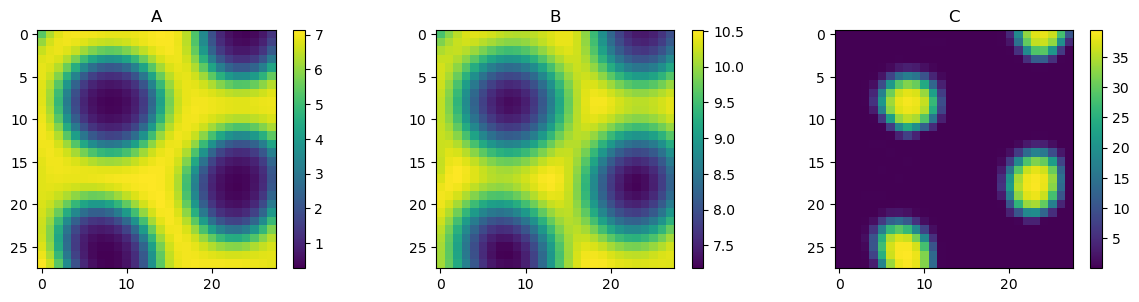

Epoch: 24000 
 data loss:0.075547, 
data A loss:0.034968, data B loss:0.017680, data C loss:0.022899, 
Laplacian A loss:0.325406, Laplacian B loss:0.066634
Physics loss:1.286279
Negative loss:0.000000

 b_A=-0.0453, b_B=-0.0078, b_C=0.3188, V_A=17.5085, V_B=98.2566, V_C=202.7783, mu_A=0.8807, mu_B=4.8871, K_AA=5.0371, K_AB=4.9869, K_AC=27.3281, K_BA=10.0884, K_BC=4.0995, K_CB=8.5987, K_CC=14.3153


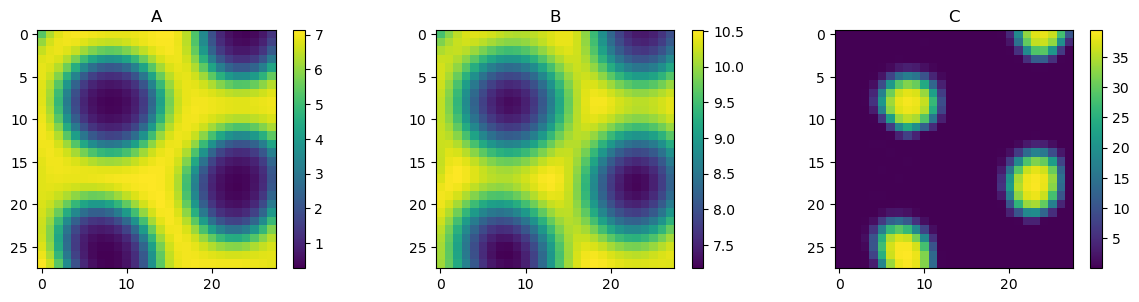

Epoch: 25000 
 data loss:0.073208, 
data A loss:0.034674, data B loss:0.016874, data C loss:0.021659, 
Laplacian A loss:0.317557, Laplacian B loss:0.063449
Physics loss:1.263712
Negative loss:0.000000

 b_A=-0.0449, b_B=-0.0076, b_C=0.3183, V_A=17.5369, V_B=98.2707, V_C=210.6158, mu_A=0.8806, mu_B=4.8876, K_AA=5.0385, K_AB=4.9870, K_AC=27.3281, K_BA=10.0815, K_BC=4.0568, K_CB=8.5494, K_CC=14.2995


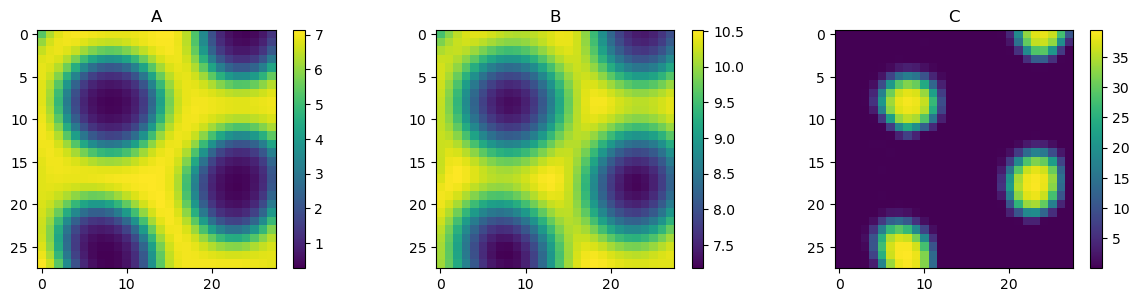

Epoch: 26000 
 data loss:0.072072, 
data A loss:0.034433, data B loss:0.016215, data C loss:0.021424, 
Laplacian A loss:0.309041, Laplacian B loss:0.059908
Physics loss:1.243653
Negative loss:0.000000

 b_A=-0.0465, b_B=-0.0081, b_C=0.3176, V_A=17.5651, V_B=98.2853, V_C=218.1774, mu_A=0.8806, mu_B=4.8884, K_AA=5.0400, K_AB=4.9874, K_AC=27.3281, K_BA=10.0746, K_BC=4.0175, K_CB=8.5116, K_CC=14.2861


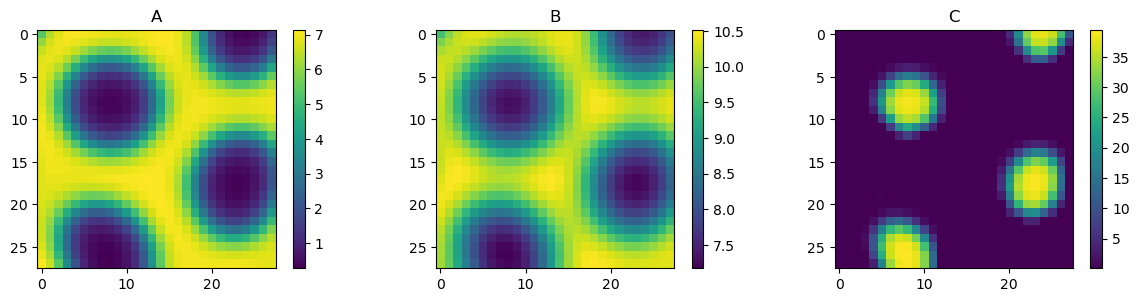

Epoch: 27000 
 data loss:0.069514, 
data A loss:0.034244, data B loss:0.015589, data C loss:0.019680, 
Laplacian A loss:0.303326, Laplacian B loss:0.057785
Physics loss:1.224896
Negative loss:0.000000

 b_A=-0.0456, b_B=-0.0082, b_C=0.3182, V_A=17.5644, V_B=98.2962, V_C=225.4409, mu_A=0.8807, mu_B=4.8891, K_AA=5.0404, K_AB=4.9876, K_AC=27.3281, K_BA=10.0748, K_BC=3.9824, K_CB=8.4804, K_CC=14.2732


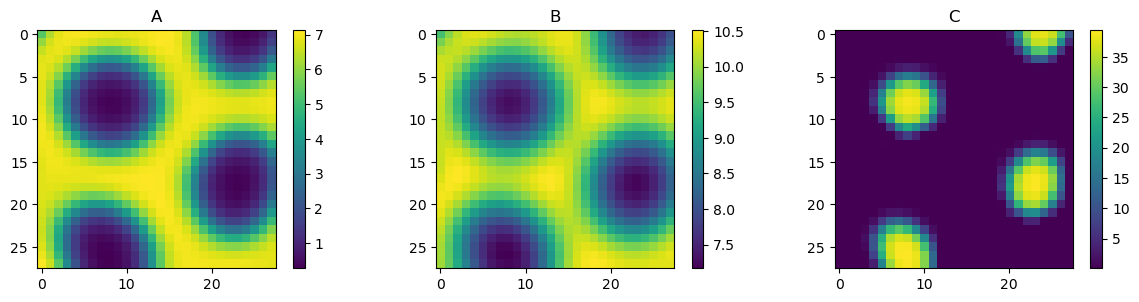

Epoch: 28000 
 data loss:0.068393, 
data A loss:0.034774, data B loss:0.015057, data C loss:0.018562, 
Laplacian A loss:0.391490, Laplacian B loss:0.056331
Physics loss:1.210833
Negative loss:0.000000

 b_A=-0.0470, b_B=-0.0104, b_C=0.3188, V_A=17.5604, V_B=98.2903, V_C=232.3853, mu_A=0.8811, mu_B=4.8907, K_AA=5.0404, K_AB=4.9876, K_AC=27.3281, K_BA=10.0750, K_BC=3.9503, K_CB=8.4379, K_CC=14.2622


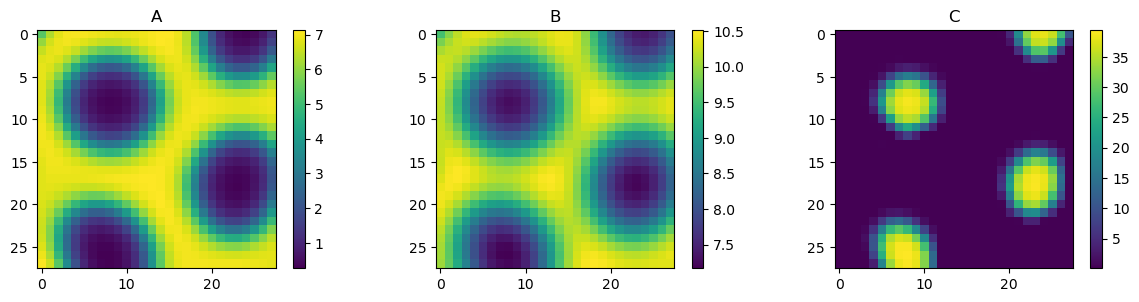

Epoch: 29000 
 data loss:0.067520, 
data A loss:0.033792, data B loss:0.014596, data C loss:0.019133, 
Laplacian A loss:0.290498, Laplacian B loss:0.052279
Physics loss:1.195519
Negative loss:0.000000

 b_A=-0.0462, b_B=-0.0080, b_C=0.3165, V_A=17.5670, V_B=98.3163, V_C=239.1451, mu_A=0.8804, mu_B=4.8900, K_AA=5.0407, K_AB=4.9876, K_AC=27.3281, K_BA=10.0753, K_BC=3.9181, K_CB=8.4182, K_CC=14.2541


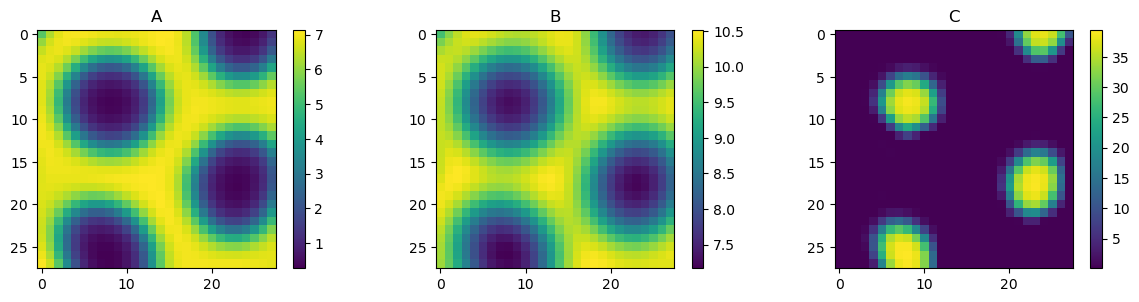

Epoch: 30000 
 data loss:0.072743, 
data A loss:0.040874, data B loss:0.014012, data C loss:0.017857, 
Laplacian A loss:1.020278, Laplacian B loss:0.075448
Physics loss:1.250531
Negative loss:0.000000

 b_A=-0.0570, b_B=-0.0197, b_C=0.3138, V_A=17.5507, V_B=98.3041, V_C=245.6251, mu_A=0.8866, mu_B=4.8961, K_AA=5.0476, K_AB=4.9955, K_AC=27.3281, K_BA=10.0658, K_BC=3.8868, K_CB=8.1692, K_CC=14.2490


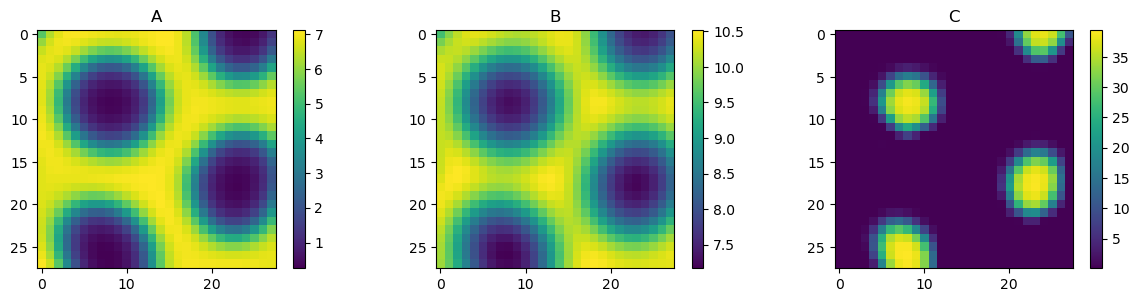

    Early dtoped at 30041
Epoch: 30041 
 data loss:0.064816, 
data A loss:0.033655, data B loss:0.014111, data C loss:0.017051, 
Laplacian A loss:0.287032, Laplacian B loss:0.053377
Physics loss:1.181750
Negative loss:0.000000

 b_A=-0.0449, b_B=-0.0080, b_C=0.3179, V_A=17.5555, V_B=98.3176, V_C=245.8816, mu_A=0.8804, mu_B=4.8903, K_AA=5.0403, K_AB=4.9872, K_AC=27.3281, K_BA=10.0795, K_BC=3.8901, K_CB=8.4036, K_CC=14.2439


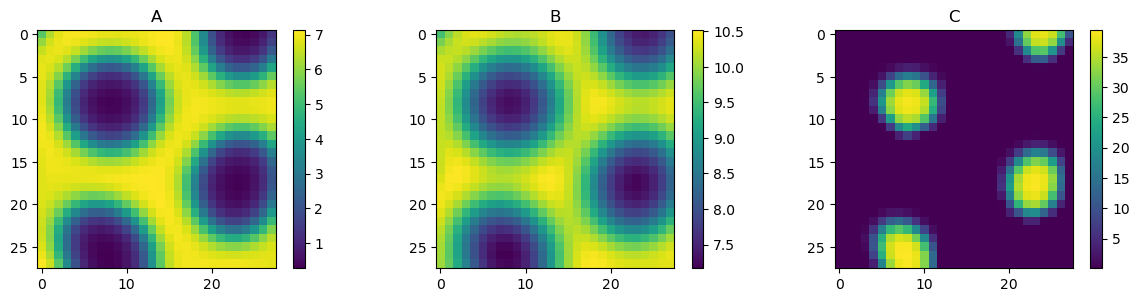

In [6]:
torch.manual_seed(42)
np.random.seed(42)
dtype = torch.float32
torch.set_default_dtype(dtype)

def create_var(init=None):
    if init is None:
        return torch.nn.Parameter(torch.ones(1, requires_grad=True, device=dev_str)), []
    else:
        return torch.nn.Parameter(init*torch.ones(1, requires_grad=True, device=dev_str)), []


D_A=params["D_A"]#, sampled_D_A = create_var()
D_B=params["D_B"]#, sampled_D_B = create_var()
b_A, sampled_b_A = create_var(1)
b_B, sampled_b_B = create_var(1)
b_C, sampled_b_C = create_var(1)
V_A, sampled_V_A = create_var(1)
V_B, sampled_V_B = create_var(1)
V_C, sampled_V_C = create_var(1)
mu_A, sampled_mu_A = create_var(1)
mu_B, sampled_mu_B = create_var(1)
mu_C=params["mu_C"]#, sampled_mu_C = create_var()
K_AA, sampled_K_AA = create_var(K_AA_init)
K_AB, sampled_K_AB = create_var(K_AB_init)
K_AC, sampled_K_AC = create_var(K_AC_init)
K_BA, sampled_K_BA = create_var(K_BA_init)
K_BC, sampled_K_BC = create_var(K_BC_init)
K_CB, sampled_K_CB = create_var(K_CB_init)
K_CC, sampled_K_CC = create_var(K_CC_init)
n = params['n']

params_name_list = [#"D_A", "D_B", 
                    "b_A", "b_B", "b_C", "V_A", "V_B", "V_C", "mu_A", "mu_B", #"mu_C",
                    "K_AA", "K_AB", "K_AC", "K_BA", "K_BC", "K_CB", 
                    "K_CC"
]

params_list = [#D_A, D_B, 
               b_A, b_B, b_C, V_A, V_B, V_C, mu_A, mu_B, #mu_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, 
               K_CC
]

params_sampled_list =[#sampled_D_A, sampled_D_B,
                      sampled_b_A, sampled_b_B, sampled_b_C, sampled_V_A, sampled_V_B, sampled_V_C,
                      sampled_mu_A, sampled_mu_B, #sampled_mu_C,
                      sampled_K_AA, sampled_K_AB, sampled_K_AC, sampled_K_BA, sampled_K_BC,
                      sampled_K_CB, sampled_K_CC
                     ]

###########################################################
# Inputs
# restrict to inner boundaries
x = torch.linspace(0, run_params.Lx, run_params.Ix)[x_slice].to(device)
y = torch.linspace(0, run_params.Ly, run_params.Jy)[y_slice].to(device)
X,Y = torch.meshgrid(x, y, indexing='ij')
data_X = torch.vstack([X.flatten(), Y.flatten()]).T.requires_grad_(True).to(device)

def transform(x, l, u):
    return (u-l)*x + l

x2 = transform(torch.rand(run_params.Ix),torch.min(x).item(),torch.max(x).item())
y2 = transform(torch.rand(run_params.Jy),torch.min(y).item(),torch.max(y).item())
X2,Y2 = torch.meshgrid(x2, y2, indexing='ij')
physics_X = torch.vstack([X2.flatten(), Y2.flatten()]).T.requires_grad_(True).to(device)
##########################################################
#   Data
# restrict to inner boundaries
data_A = torch.from_numpy(A_n[x_slice,y_slice].flatten()).to(device)
data_B = torch.from_numpy(B_n[x_slice,y_slice].flatten()).to(device)
data_C = torch.from_numpy(C_n[x_slice,y_slice].flatten()).to(device)
###########################################################
# Laplacians
# First, find the finite-diff Laplacian on the whole domain,
# then, select the inner boundaries. This way, the boundaries 
# effets removed
diffusion_scale_factor = (run_params.Ix-1)*(run_params.Jy-1)/(run_params.Lx*run_params.Ly)
laplacianA = diffusion_scale_factor * grad_diff(A_n)
laplacianB = diffusion_scale_factor * grad_diff(B_n)

laplacianA = torch.tensor(laplacianA[x_slice,y_slice].flatten()).to(device)
laplacianB = torch.tensor(laplacianB[x_slice,y_slice].flatten()).to(device)
###########################################################
zeors_tensor = torch.zeros(data_X.shape[0]).to(device)
###########################################################
# Model
lb = torch.tensor([torch.min(x).item(), torch.min(y).item()]).to(device)
ub = torch.tensor([torch.max(x).item(), torch.max(y).item()]).to(device)
model = Net_sep_dense_normalised(2,3,[128,128,128,128], lb, ub).to(device)
###########################################################
# optimizer
optimizer = torch.optim.Adam([{'params': model.parameters(), 'lr': 1e-4},
                              {'params': params_list, 'lr': .1}]
                              , lr=1e-4)#.LBFGS([*model.parameters(), *params_list], lr=1
                             #,line_search_fn='strong_wolfe')#


epochs = 30000
loss_data = 0.0
lambda_data = 1.0
loss_physics = 0.0
lambda_physics = 1e-4
loss_laplacian_physics = 0.0
lambda_physics_laplacian = 1e-2
loss_negative = 0
lambda_negative = 100

losses = np.zeros((7, epochs+6000))
last_loss = np.inf

def act(x, km, n=2):
    return x**n / (x**n + km**n)

def inh(x, km, n=2):
    return km**n / (x**n + km**n)

for i in range(epochs +6000): 
    # L-BFGS
    def closure():
        
        optimizer.zero_grad()

        #################################
        # data loss
        data_f_hat = model(data_X)
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        loss_A_data = torch.mean((data_A - data_A_hat)**2)
        loss_B_data = torch.mean((data_B - data_B_hat)**2)
        loss_C_data = torch.mean((data_C - data_C_hat)**2)
        loss_data = (loss_A_data + loss_B_data + loss_C_data)/3
        #################################
        loss_negative = torch.mean(torch.maximum(-data_A_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_B_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_C_hat, zeors_tensor)**2
                       )
        #################################
        # Laplacians derivatives        
        laplacianA_hat = Laplacian(data_A_hat, data_X)
        laplacianB_hat = Laplacian(data_B_hat, data_X)
        
        A_loss_laplacian = torch.mean((laplacianA_hat-laplacianA)**2)
        B_loss_laplacian = torch.mean((laplacianB_hat-laplacianB)**2)
        loss_laplacian_physics = A_loss_laplacian + B_loss_laplacian
        ###############################
        # physics derivatives  
        physics_f_hat = model(physics_X)
        A = physics_f_hat[0].squeeze() 
        B = physics_f_hat[1].squeeze() 
        C = physics_f_hat[2].squeeze() 
        
        laplacianA_hat = Laplacian(A, physics_X)
        laplacianB_hat = Laplacian(B, physics_X)
        
        F_A =  b_A + V_A*act(A, K_AA, n)*inh(B, K_BA, n) - mu_A * A    
        F_B =  b_B + V_B*act(A, K_AB, n)*inh(C, K_CB, n) - mu_B * B        
        F_C =  b_C + V_C*inh(A, K_AC, n)*inh(B, K_BC, n)*act(C, K_CC, n) - mu_C * C        

        dAdt = D_A * laplacianA_hat + F_A
        dBdt = D_B * laplacianB_hat + F_B
        dCdt = F_C
        ################################
        # physics loss
        # Construct the physics loss here
        A_loss_physics = torch.mean(dAdt**2)
        B_loss_physics = torch.mean(dBdt**2)
        C_loss_physics = torch.mean(dCdt**2)
        loss_physics = (A_loss_physics  
                        + B_loss_physics 
                        + C_loss_physics)
        ###############################
        total_loss = (
            +lambda_data*loss_data            
            +lambda_physics_laplacian*loss_laplacian_physics
            +lambda_physics*loss_physics
            #+lambda_negative*loss_negative
                        )

        total_loss.backward(retain_graph=True)
        
        
        losses[:,i] = (loss_A_data.item(), loss_B_data.item(), loss_C_data.item(), 
                       A_loss_laplacian.item(), B_loss_laplacian.item(),
                       loss_physics.item(), loss_negative.item())                    
            
        return total_loss
    
    
    
    optimizer.step(closure)
    
    def show_outputs(i):
        ls = np.sqrt(losses[:, i])
        print("============================================")
        print(f"Epoch: {i+1} \n data loss:{np.sum(ls[0:3]):.6f}, \n"
              f"data A loss:{ls[0]:.6f}, data B loss:{ls[1]:.6f}, data C loss:{ls[2]:.6f}, \n"
              f"Laplacian A loss:{ls[3]:.6f}, Laplacian B loss:{ls[4]:.6f}\n"
              f"Physics loss:{ls[5]:.6f}\n"
              f"Negative loss:{ls[6]:.6f}\n"
              f"\n"
              ,
              ", ".join([f"{name}={param.item():.4f}" for param, name in zip(params_list, params_name_list)])
             )
        data_f_hat = model(data_X)        
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        plot_n_im([to(data_A_hat.cpu().detach().numpy()), 
                   to(data_B_hat.cpu().detach().numpy()), 
                   to(data_C_hat.cpu().detach().numpy())], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show()
       
    
    if i < epochs and last_loss > np.sum(losses[:,i]):
        last_loss =  np.sum(losses[:,i])
            
    elif np.sum(losses[:,i]) < last_loss:
        print("============================================")
        print(f"    Early dtoped at {i+1}")
        print("============================================")
        show_outputs(i)
        early_stop = True
        with torch.no_grad():
            for i,(param, name) in enumerate(zip(params_list, params_name_list)):
                l,u = get_bound(name)
                param[:] = param.clamp(l,u)
                params_sampled_list[i].append(param.item())
        break        
    
    if (i+1)%1000 == 0 or i==0:        
        show_outputs(i)
        
    with torch.no_grad():
        for i,(param, name) in enumerate(zip(params_list, params_name_list)):
            l,u = get_bound(name)
            param[:] = param.clamp(l,u)
            params_sampled_list[i].append(param.item())
            


# Plot the trained outputs

A RMSE:0.033633325545488056 B RMSE:0.014086901277737233 C RMSE:0.017071064715983335
F_A actual:0.8813861277557233, F_A:0.8827097415924072, RMSE: 0.02648426641906337
F_B actual:819.2497758940649, F_B:809.997314453125, RMSE: 0.3602470476597055
F_C actual:0.13544275190140878, F_C:0.18521380424499512, RMSE: 0.1630046703837255

Laplacian A RMSE: 0.28691040807963175
Laplacian B RMSE: 0.053504149511146445

dAdt RMSE: 0.026523694761093963
dBdt RMSE: 0.37251256254577125
dCdt RMSE: 0.1630046703837255


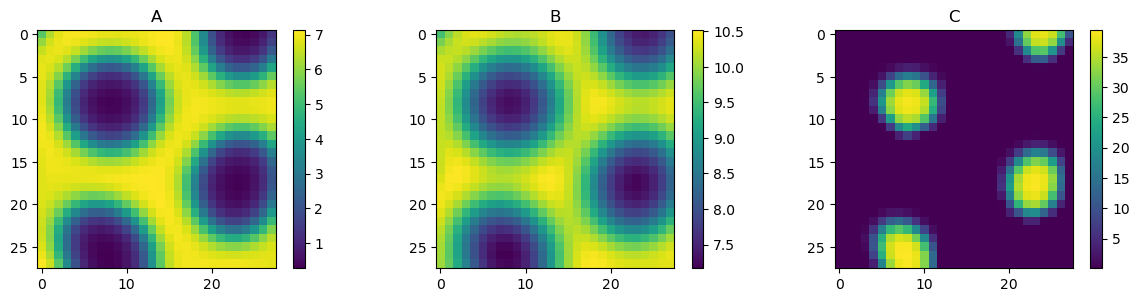

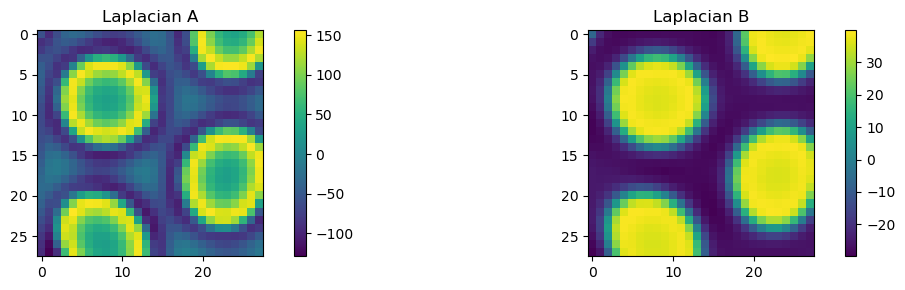

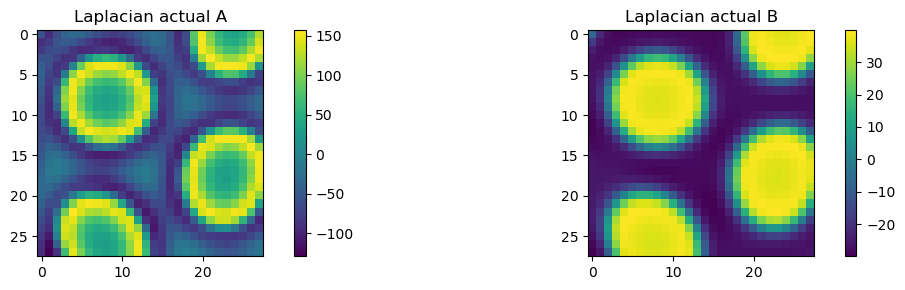

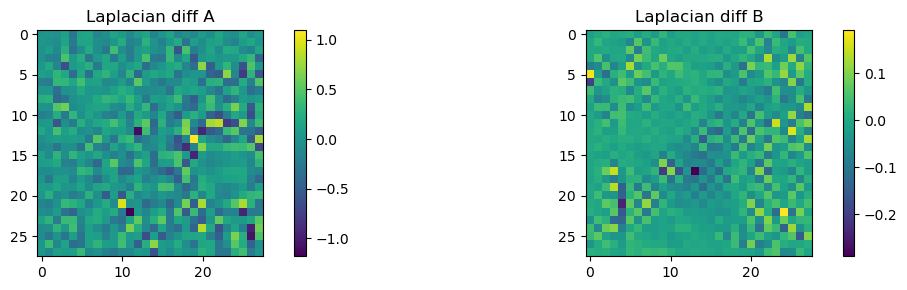

In [7]:
physics_f = model(data_X)
A_hat = physics_f[0].squeeze()
B_hat = physics_f[1].squeeze()
C_hat = physics_f[2].squeeze()

laplacianA_hat = Laplacian(A_hat, data_X)
laplacianB_hat = Laplacian(B_hat, data_X)

A_hat = to(A_hat.cpu().detach().numpy())
B_hat = to(B_hat.cpu().detach().numpy())
C_hat = to(C_hat.cpu().detach().numpy())
laplacianA_hat = to(laplacianA_hat.cpu().detach().numpy())
laplacianB_hat = to(laplacianB_hat.cpu().detach().numpy())


laplacianA = diffusion_scale_factor * grad_diff(A_n)[x_slice,y_slice]
laplacianB = diffusion_scale_factor * grad_diff(B_n)[x_slice,y_slice]

n = params["n"]

A = A_n[x_slice,y_slice]
B = B_n[x_slice,y_slice]
C = C_n[x_slice,y_slice]

F_A =  params["b_A"] + params["V_A"]*act(A, params["K_AA"], n)*inh(B, params["K_BA"], n) - params["mu_A"] * A
F_A_hat =  params["b_A"] + params["V_A"]*act(A_hat, params["K_AA"], n)*inh(B_hat, params["K_BA"], n) - params["mu_A"] * A_hat
F_B =  params["b_B"] + params["V_B"]*act(A, params["K_AB"], n)*inh(C, params["K_CB"], n) - params["mu_B"] * B
F_B_hat =  params["b_B"] + params["V_B"]*act(A_hat, params["K_AB"], n)*inh(C_hat, params["K_CB"], n) - params["mu_B"] * B_hat
F_C =  params["b_C"] + params["V_C"]*inh(A, params["K_AC"], n)*inh(B, params["K_BC"], n)*act(C, params["K_CC"], n) - params["mu_C"] * C
F_C_hat =  params["b_C"] + params["V_C"]*inh(A_hat, params["K_AC"], n)*inh(B_hat, params["K_BC"], n)*act(C_hat, params["K_CC"], n) - params["mu_C"] * C_hat


dAdt = params["D_A"]*laplacianA + F_A
dAdt_hat = params["D_A"]*laplacianA_hat + F_A_hat
dBdt = params["D_B"]*laplacianB + F_B
dBdt_hat = params["D_B"]*laplacianB_hat + F_B_hat

print(f"A RMSE:{np.sqrt(np.mean((A_hat-A)**2))}",
      f"B RMSE:{np.sqrt(np.mean((B_hat-B)**2))}",
      f"C RMSE:{np.sqrt(np.mean((C_hat-C)**2))}")

print(f"F_A actual:{np.mean(F_A**2)}, F_A:{np.mean(F_A_hat**2)}, RMSE: {np.sqrt(np.mean((F_A - F_A_hat)**2))}")
print(f"F_B actual:{np.mean(F_B**2)}, F_B:{np.mean(F_B_hat**2)}, RMSE: {np.sqrt(np.mean((F_B - F_B_hat)**2))}")
print(f"F_C actual:{np.mean(F_C**2)}, F_C:{np.mean(F_C_hat**2)}, RMSE: {np.sqrt(np.mean((F_C - F_C_hat)**2))}")
      

print()
print(f"Laplacian A RMSE: {np.sqrt(np.mean((laplacianA_hat-laplacianA)**2))}")
print(f"Laplacian B RMSE: {np.sqrt(np.mean((laplacianB_hat-laplacianB)**2))}")

print()
print(f"dAdt RMSE: {np.sqrt(np.mean((dAdt-dAdt_hat)**2))}")
print(f"dBdt RMSE: {np.sqrt(np.mean((dBdt-dBdt_hat)**2))}")
print(f"dCdt RMSE: {np.sqrt(np.mean((F_C-F_C_hat)**2))}")

plot_n_im([A_hat, B_hat, C_hat], 
          ["A", "B", "C"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()


plot_n_im([laplacianA_hat, laplacianB_hat], 
          ["Laplacian A", "Laplacian B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA, laplacianB], 
          ["Laplacian actual A", "Laplacian actual B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA_hat-laplacianA, laplacianB_hat-laplacianB], 
          ["Laplacian diff A", "Laplacian diff B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()



# Plot losses

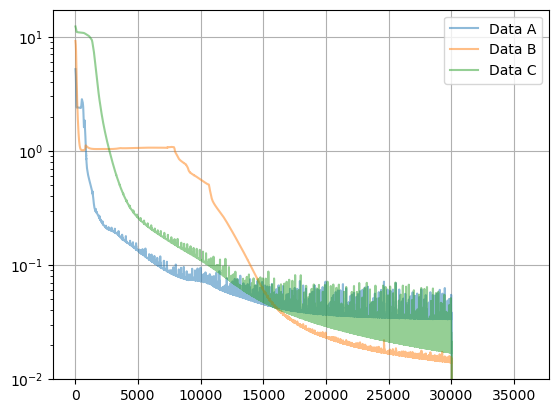

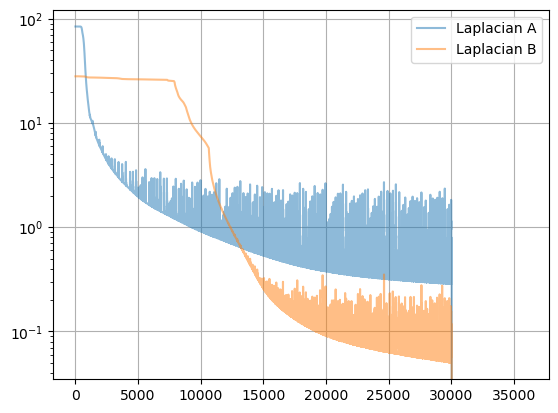

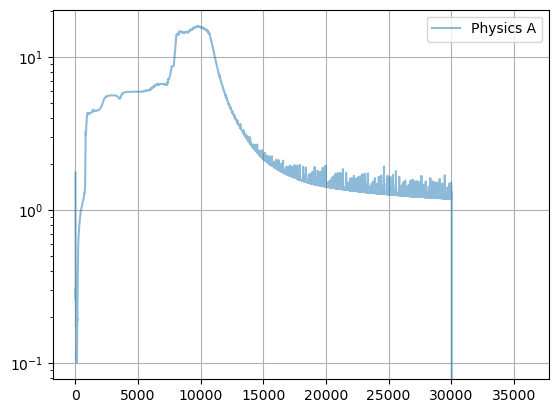

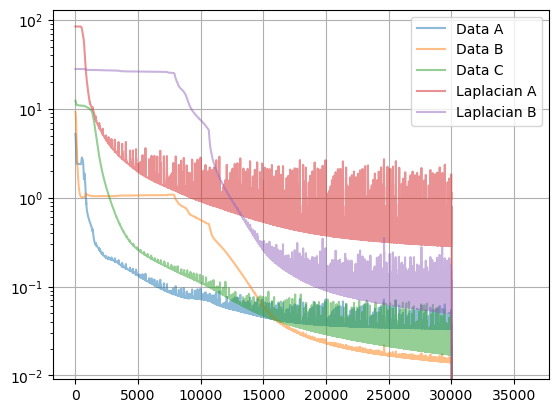

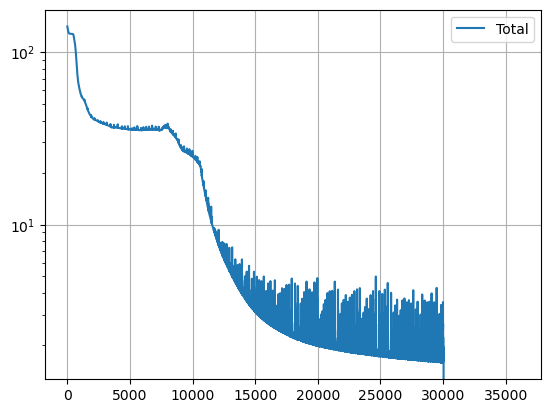

In [8]:
ls= np.sqrt(losses)
plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[5,:], alpha=.5, label="Physics A")
plt.yscale('log');plt.grid();plt.legend();plt.show()


plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log'); plt.grid();plt.legend();plt.show()

plt.plot(np.sum(ls, axis=0), label="Total")
plt.yscale('log'); plt.grid();plt.legend();plt.show()


# Plot the trained Field and its difference

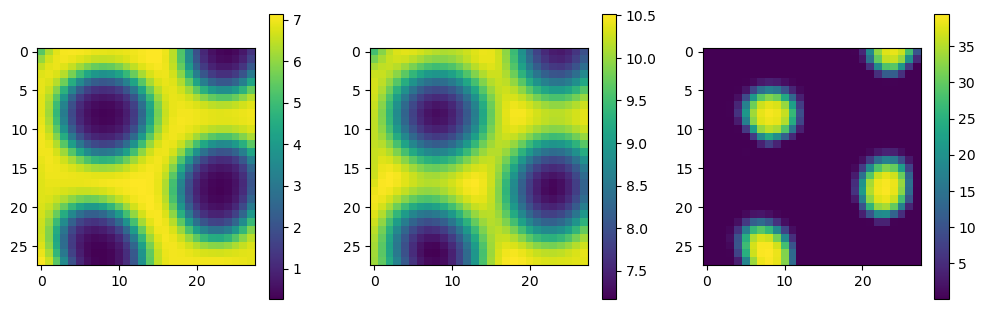

In [9]:
solution_hat = model(data_X)
A_hat = to(solution_hat[0].cpu().detach().numpy())
B_hat = to(solution_hat[1].cpu().detach().numpy())
C_hat = to(solution_hat[2].cpu().detach().numpy())
_ = plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(A_hat)
plt.colorbar(shrink=.5)
plt.subplot(132)
plt.imshow(B_hat)
plt.colorbar(shrink=.5)
plt.subplot(133)
plt.imshow(C_hat)
plt.colorbar(shrink=.5)
plt.tight_layout()
plt.show()

0.033633325545488056
0.014086901277737233
0.017071064715983335


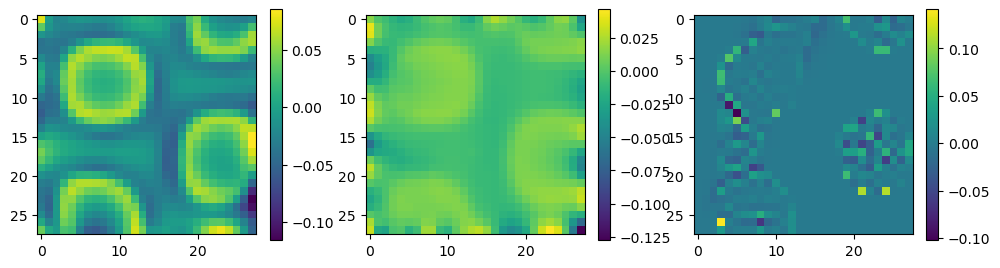

In [10]:
_ = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(A_hat-A)
print(np.sqrt(np.mean((A_hat-A)**2)))
plt.colorbar(shrink=.75)
plt.subplot(132)
plt.imshow(B_hat-B)
print(np.sqrt(np.mean((B_hat-B)**2)))
plt.colorbar(shrink=.75)
plt.subplot(133)
plt.imshow(C_hat-C)
print(np.sqrt(np.mean((C_hat-C)**2)))
plt.colorbar(shrink=.75)
plt.show()


# Second optimisation
## Find the parameters

In [11]:
estimated_params = dict()
for l, name in zip(params_list, params_name_list):    
    estimated_params[name] = l.item()

In [12]:
Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (np.nan,np.nan)
    return Ks_bounds[name]
print("name \tOriginl \tEst. \tClosest Bound \tBounds")
print("-------------------------------------------------------------------------------------------------------------")
print("\n".join([ f"{name}:\t{params[name]:.3f}\t\t"                                  
                  f"{estimated_params[name]:.3f}\t\t"
                  f"{closest_bound(name, estimated_params[name]):.3f}\t\t"
                  f"({get_bound(name)[0]:.3f},{get_bound(name)[1]:.3f})"
      for name in params_name_list
]))

name 	Originl 	Est. 	Closest Bound 	Bounds
-------------------------------------------------------------------------------------------------------------
b_A:	0.001		0.000		nan		(nan,nan)
b_B:	0.100		0.000		nan		(nan,nan)
b_C:	0.100		0.318		nan		(nan,nan)
V_A:	20.000		17.555		nan		(nan,nan)
V_B:	100.000		98.318		nan		(nan,nan)
V_C:	25.000		245.882		nan		(nan,nan)
mu_A:	1.000		0.880		nan		(nan,nan)
mu_B:	5.000		4.890		nan		(nan,nan)
K_AA:	5.000		5.040		0.053		(0.053,27.328)
K_AB:	5.000		4.987		0.053		(0.053,27.328)
K_AC:	1.000		27.328		27.328		(0.053,27.328)
K_BA:	10.000		10.080		1.760		(1.760,40.465)
K_BC:	10.000		3.890		1.760		(1.760,40.465)
K_CB:	10.000		8.404		0.053		(0.053,158.176)
K_CC:	1.000		14.244		0.053		(0.053,158.176)


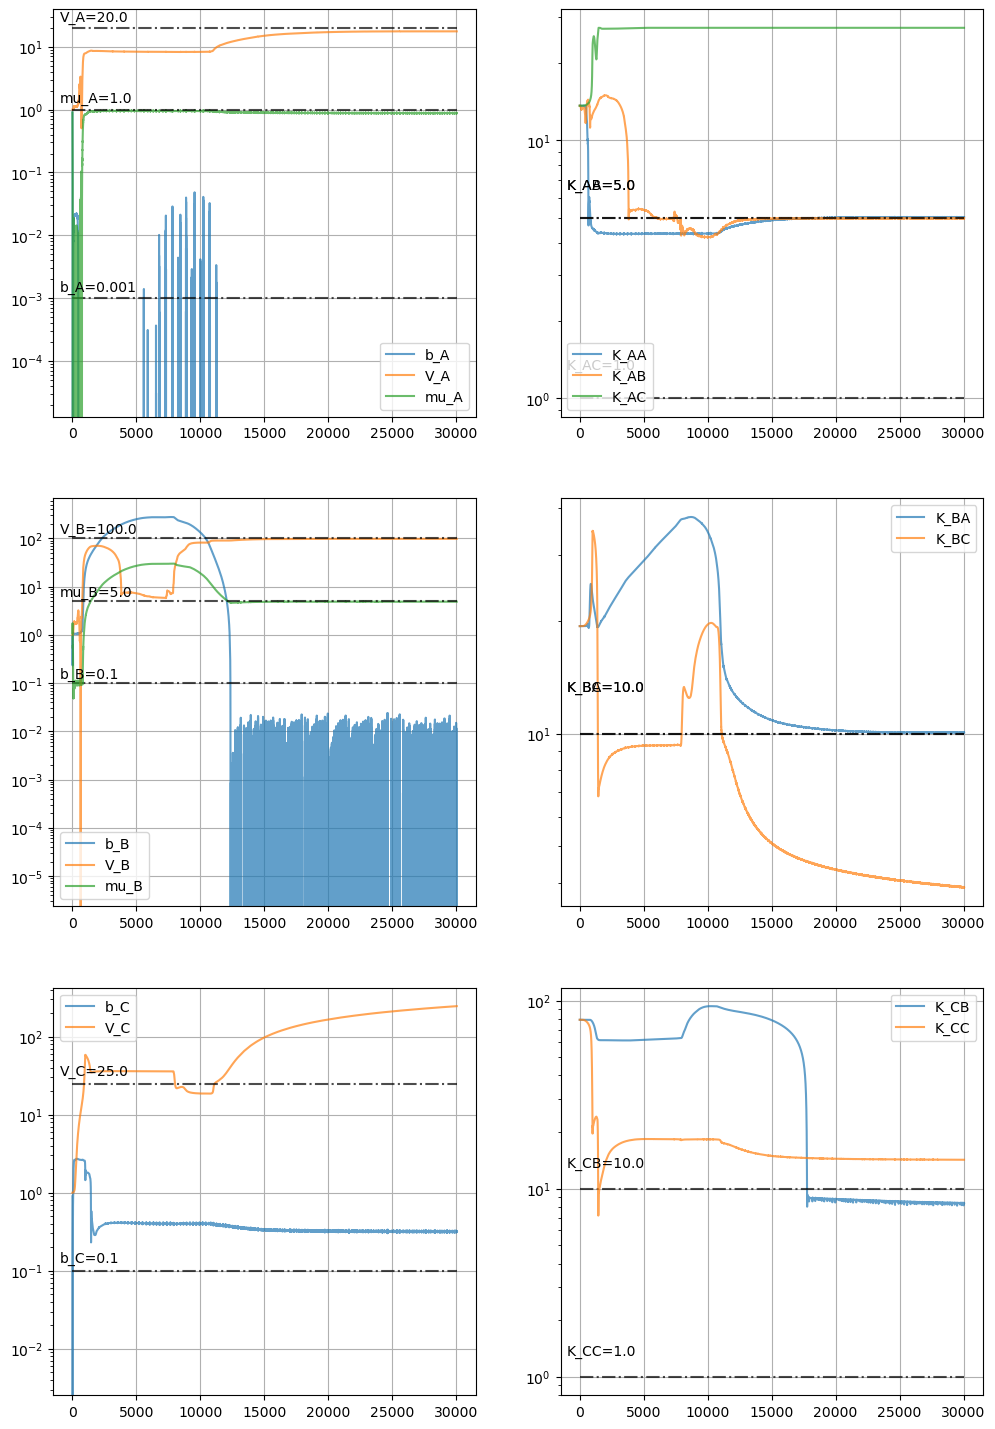

In [18]:
def plot_params(ax, names):    
    for i,(param, name) in enumerate(zip(params_list, params_name_list)):    
        if name not in names:
            continue
        ax.plot(params_sampled_list[i], label=f"{name}", alpha=.7)
        ax.hlines(params[name], 0, len(params_sampled_list[i]), 
                   linestyles='-.', alpha=.7, color='black')
        ax.text(-1000, 1.3*params[name], f"{name}={params[name]}")
    plt.yscale('log');plt.legend();plt.grid()   
    
_ = plt.figure(figsize=(12,18))
plot_params(plt.subplot(321), ["b_A", "mu_A", "V_A"])
plot_params(plt.subplot(322), ["K_AA","K_AB","K_AC"])
plot_params(plt.subplot(323), ["b_B", "mu_B", "V_B"])
plot_params(plt.subplot(324), ["K_BA","K_BC"])
plot_params(plt.subplot(325), ["b_C", "mu_C", "V_C"])
plot_params(plt.subplot(326), ["K_CB","K_CC"])

In [17]:
import pickle

torch.save(model, "./06_outputs/model_PINN_25")
torch.save(model.state_dict(), "./06_outputs/model_PINN_state_25")
with open('./06_outputs/model_PINN_params_name_list_25.npy', 'wb') as f:
    np.save(f, params_name_list)    
with open('./06_outputs/model_PINN_losses_25.npy', 'wb') as f:
    np.save(f, losses)    
with open(f"./06_outputs/model_PINN_estimated_params_25.pkl", "wb") as f:
    pickle.dump((dict(params),  dict(estimated_params)), f)
with open(f"./06_outputs/model_PINN_estimated_params_list_25.pkl", "wb") as f:
    pickle.dump(params_sampled_list, f)     

In [14]:
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")

sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")

from turing.three_nodes_circuits import create_circuit_3954
from pde_solvers.cn import RD_2D_1st_Order, Neumann_Boundary_2D

D_A, D_B , n, mu_C= 0.01, 1.0, 4, params["mu_C"]
model_integrator = RD_2D_1st_Order(Ds=[D_A, D_B, 0], 
                        delta_t=100/5000, 
                        Lx=10, Ly=10, 
                        Ix=128, Jy=128,
                        boundary_condition=Neumann_Boundary_2D)

/end/home/rh2310/.conda/envs/pytorch/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


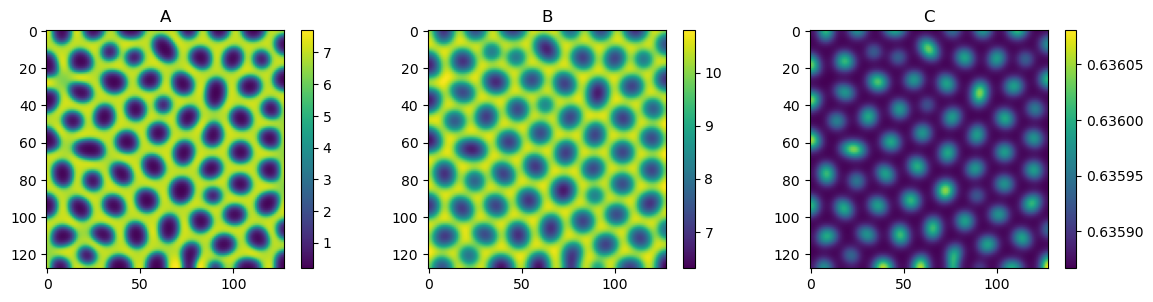

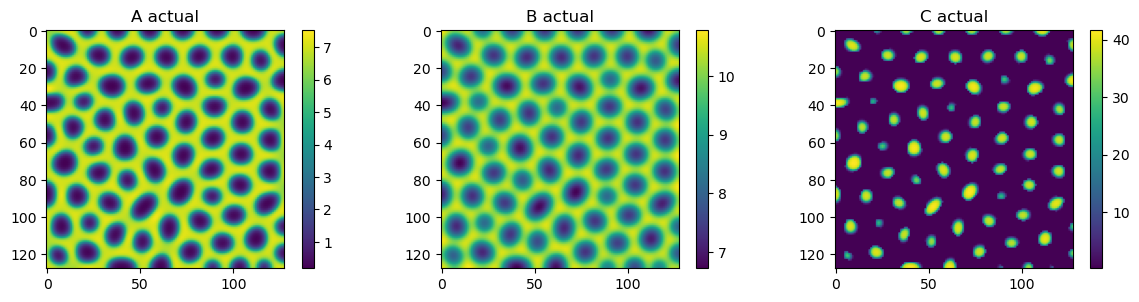

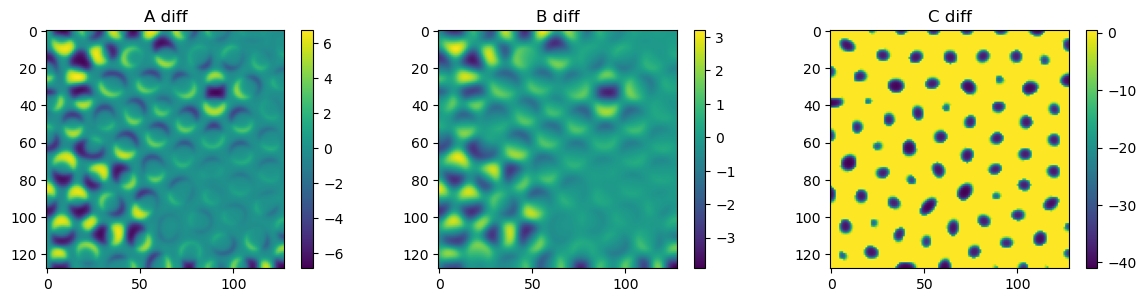

In [15]:

params2 = {}
for k,v in estimated_params.items():
    if not k.startswith("K"):
        params2[k] = v
    else:
        lower, upper = Ks_bounds[k]
        if v < lower:
            params2[k] = lower
        elif v > upper:
            params2[k] = upper
        else:
            params2[k] = v

kinetics = create_circuit_3954(n,params2["b_A"], params2["mu_A"], params2["V_A"], 
                                       params2["K_AA"], params2["K_AB"], params2["K_AC"],
                                       params2["b_B"], params2["mu_B"], params2["V_B"], 
                                       params2["K_BA"], params2["K_BC"],
                                       params2["b_C"], mu_C, params2["V_C"], 
                                       params2["K_CB"], params2["K_CC"])

(A_init, B_init, C_init) = (solution[0, 0, :, :].flatten(),
                            solution[0, 1, :, :].flatten(),
                            solution[0, 2, :, :].flatten())
solution_test = model_integrator.integrate([A_init, B_init, C_init],kinetics, 4*5000, record_steps=5000)

A_test = solution_test[-1,0, :].reshape((128,128))
B_test = solution_test[-1,1, :].reshape((128,128))
C_test = solution_test[-1,2, :].reshape((128,128))
plot_n_im([A_test,B_test,C_test], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([solution[105, 0, :, :],solution[105, 1, :, :],solution[105, 2, :, :]], 
           ["A actual","B actual","C actual"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([A_test-solution[105, 0, :, :],
           B_test-solution[105, 1, :, :],
           C_test-solution[105, 2, :, :]], 
           ["A diff","B diff","C diff"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

In [16]:
{1:31,
2:3,
3:9, 
4:25,
5:14,
6:60,
7:24,
8:26,
9:65}

{1: 31, 2: 3, 3: 9, 4: 25, 5: 14, 6: 60, 7: 24, 8: 26, 9: 65}